<img src="19 and 20 - Naive Bayes.jpg" alt="Drawing" style="width: 1200px;"/>

<img src="20 - Logistic Regression.jpg" alt="Drawing" style="width: 1200px;"/>

<img src="21 - Decision Tree.jpg" alt="Drawing" style="width: 1200px;"/>

In [1]:
import pandas as pd

In [2]:
df_student_historic_raw_data = pd.read_csv('../data/demo1_historic.csv')

## 1 - EDA

In [3]:
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(cell) for cell in df.iloc[0, :]]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_memory_usage_list = [df[col].memory_usage() for col in col_name_list]
    df_total_memory_usage = sum(col_memory_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, df_total_memory_usage

In [4]:
df_student_historic_raw_data.head()

,ID,Age,Is_Married,Has_Children,Children_Count,Home_Distance,Drinks_Tea,Lectures_Missed,Average_Assignments_Score,Exam_Result
0,S1,41,1,1,3,23,0,1,41,1
1,S2,37,0,0,0,5,1,8,75,1
2,S3,49,0,0,0,44,1,9,52,1
3,S4,24,0,0,0,40,1,1,54,1
4,S5,48,1,1,3,36,0,2,32,1


In [5]:
import seaborn as sb

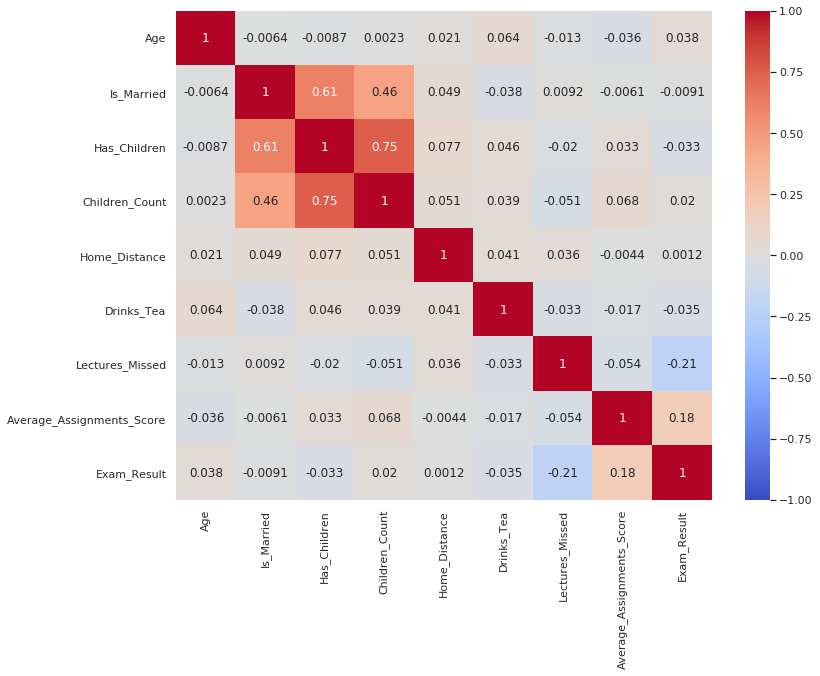

In [6]:
sb.set(rc={'figure.figsize':(12,9)})
sb.heatmap(df_student_historic_raw_data.drop('ID', axis=1).corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## 2 - Preprocessing (not required as all variables are ints and no missing data)

## 3 - Feature Selection

<pre>
x                    -> y
features             -> labels
input variable       -> output variable 
independent variable -> dependent variable
predictor variable   -> response variable
source variable      -> target variable
</pre>

In [7]:
labels = df_student_historic_raw_data.loc[:, 'Exam_Result']
labels.shape

(1000,)

In [8]:
labels.value_counts()

1    618
0    382
Name: Exam_Result, dtype: int64

### Feature set 1: all features (except ID)

In [9]:
df_feature_set_1 = df_student_historic_raw_data.drop(['ID', 'Exam_Result'], axis=1)
df_feature_set_1.shape

(1000, 8)

### Feature set 2: based on correlation analysis (removed 2 dependent features)

In [10]:
df_feature_set_2 = df_student_historic_raw_data.drop(['ID', 'Exam_Result', 'Children_Count', 'Is_Married'], axis=1)
df_feature_set_2.shape

(1000, 6)

## 4 - Data Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X1_train, X1_test, y_train, y_test = train_test_split(df_feature_set_1, labels, random_state=0)
print(X1_train.shape, y_train.shape)
print(X1_test.shape, y_test.shape)

(750, 8) (750,)
(250, 8) (250,)


In [13]:
X2_train, X2_test = train_test_split(df_feature_set_2, random_state=0)
print(X2_train.shape, y_train.shape)
print(X2_test.shape, y_test.shape)

(750, 6) (750,)
(250, 6) (250,)


## 5 - Create and evaluate models

In [14]:
from sklearn.linear_model import LogisticRegression as LRC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score

In [15]:
model_names = []
model_feature_counts = []
model_feature_names = []
model_acc_scores = []
model_rec_scores = []
model_bac_scores = []

### Model 1: LRC with X1

In [16]:
lr_model_1 = LRC(random_state=0)
lr_model_1.fit(X1_train, y_train)

/home/ngkpg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr_model_1_y_hat = lr_model_1.predict(X1_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_1_y_hat, name='Predicted')
lr_model_1_cm = pd.crosstab(y_actual, y_predicted)
print(lr_model_1_cm, '\n')
lr_model_1_acc = accuracy_score(y_test, lr_model_1_y_hat)
lr_model_1_bac = balanced_accuracy_score(y_test, lr_model_1_y_hat)
lr_model_1_rec = recall_score(y_test, lr_model_1_y_hat)
print('ACC: {:>.2f}\tBAC: {:>.2f}\tREC: {:>.2f}'.format(lr_model_1_acc, lr_model_1_bac, lr_model_1_rec))
model_names.append('lr_model_1')
model_feature_counts.append(X1_train.shape[1])
model_feature_names.append(list(X1_train.columns))
model_acc_scores.append(lr_model_1_acc)
model_bac_scores.append(lr_model_1_bac)
model_rec_scores.append(lr_model_1_rec)

Predicted   0    1
Actual            
0          25   72
1          13  140 

ACC: 0.66	BAC: 0.59	REC: 0.92


<pre>
A   P
0   0  -> TN -> Good
0   1  -> FP -> Bad
1   0  -> FN -> Bad
1   1  -> TP -> Good

ACC = (TP + TN) / (TP + TN + FP + FN) = (25 + 140) / 250 = 0.66 = 66%
REC (True Positive Rate) = TP / (TP + FN) = 140 / (140 + 13) = 140 / 153 = 0.92 = 92%
TNR = TN / (TN + FP) = 25 / (25 + 72) = 25 / 97 = 0.26 = 26%
BAC = (TNR + TPR) / 2 = (0.92 + 0.26) / 2 = 0.59 = 59%
</pre>

### Model 2: DTC with X1

In [18]:
dt_model_1 = DTC(random_state=0)
dt_model_1.fit(X1_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
dt_model_1_y_hat = dt_model_1.predict(X1_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(dt_model_1_y_hat, name='Predicted')
dt_model_1_cm = pd.crosstab(y_actual, y_predicted)
print(dt_model_1_cm, '\n')
dt_model_1_acc = accuracy_score(y_test, dt_model_1_y_hat)
dt_model_1_bac = balanced_accuracy_score(y_test, dt_model_1_y_hat)
dt_model_1_rec = recall_score(y_test, dt_model_1_y_hat)
print('ACC: {:>.2f}\tBAC: {:>.2f}\tREC: {:>.2f}'.format(dt_model_1_acc, dt_model_1_bac, dt_model_1_rec))
model_names.append('dt_model_1')
model_feature_counts.append(X1_train.shape[1])
model_feature_names.append(list(X1_train.columns))
model_acc_scores.append(dt_model_1_acc)
model_bac_scores.append(dt_model_1_bac)
model_rec_scores.append(dt_model_1_rec)

Predicted   0    1
Actual            
0          38   59
1          50  103 

ACC: 0.56	BAC: 0.53	REC: 0.67


### Model 3: LRC with X2

In [20]:
lr_model_2 = LRC(random_state=0)
lr_model_2.fit(X2_train, y_train)
lr_model_2_y_hat = lr_model_2.predict(X2_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_2_y_hat, name='Predicted')
lr_model_2_cm = pd.crosstab(y_actual, y_predicted)
print(lr_model_2_cm, '\n')
lr_model_2_acc = accuracy_score(y_test, lr_model_2_y_hat)
lr_model_2_bac = balanced_accuracy_score(y_test, lr_model_2_y_hat)
lr_model_2_rec = recall_score(y_test, lr_model_2_y_hat)
print('ACC: {:>.2f}\tBAC: {:>.2f}\tREC: {:>.2f}'.format(lr_model_2_acc, lr_model_2_bac, lr_model_2_rec))
model_names.append('lr_model_2')
model_feature_counts.append(X2_train.shape[1])
model_feature_names.append(list(X2_train.columns))
model_acc_scores.append(lr_model_2_acc)
model_bac_scores.append(lr_model_2_bac)
model_rec_scores.append(lr_model_2_rec)

Predicted   0    1
Actual            
0          31   66
1          11  142 

ACC: 0.69	BAC: 0.62	REC: 0.93


### Model 4: DTC with X2

In [21]:
dt_model_2 = DTC(random_state=0)
dt_model_2.fit(X2_train, y_train)
dt_model_2_y_hat = dt_model_2.predict(X2_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(dt_model_2_y_hat, name='Predicted')
dt_model_2_cm = pd.crosstab(y_actual, y_predicted)
print(dt_model_2_cm, '\n')
dt_model_2_acc = accuracy_score(y_test, dt_model_2_y_hat)
dt_model_2_bac = balanced_accuracy_score(y_test, dt_model_2_y_hat)
dt_model_2_rec = recall_score(y_test, dt_model_2_y_hat)
print('ACC: {:>.2f}\tBAC: {:>.2f}\tREC: {:>.2f}'.format(dt_model_2_acc, dt_model_2_bac, dt_model_2_rec))
model_names.append('dt_model_2')
model_feature_counts.append(X2_train.shape[1])
model_feature_names.append(list(X2_train.columns))
model_acc_scores.append(dt_model_2_acc)
model_bac_scores.append(dt_model_2_bac)
model_rec_scores.append(dt_model_2_rec)

Predicted   0    1
Actual            
0          39   58
1          46  107 

ACC: 0.58	BAC: 0.55	REC: 0.70


### Model 5: RFC with X1

In [22]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [23]:
rf_model_1 = RFC(random_state=0)
rf_model_1.fit(X1_train, y_train)
rf_model_1_y_hat = rf_model_1.predict(X1_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(rf_model_1_y_hat, name='Predicted')
rf_model_1_cm = pd.crosstab(y_actual, y_predicted)
print(rf_model_1_cm, '\n')
rf_model_1_acc = accuracy_score(y_test, rf_model_1_y_hat)
rf_model_1_bac = balanced_accuracy_score(y_test, rf_model_1_y_hat)
rf_model_1_rec = recall_score(y_test, rf_model_1_y_hat)
print('ACC: {:>.2f}\tBAC: {:>.2f}\tREC: {:>.2f}'.format(rf_model_1_acc, rf_model_1_bac, rf_model_1_rec))
model_names.append('rf_model_1')
model_feature_counts.append(X1_train.shape[1])
model_feature_names.append(list(X1_train.columns))
model_acc_scores.append(rf_model_1_acc)
model_bac_scores.append(rf_model_1_bac)
model_rec_scores.append(rf_model_1_rec)

Predicted   0    1
Actual            
0          35   62
1          19  134 

ACC: 0.68	BAC: 0.62	REC: 0.88


### Model 6: RFC with X2

In [24]:
rf_model_2 = RFC(random_state=0)
rf_model_2.fit(X2_train, y_train)
rf_model_2_y_hat = rf_model_2.predict(X2_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(rf_model_2_y_hat, name='Predicted')
rf_model_2_cm = pd.crosstab(y_actual, y_predicted)
print(rf_model_2_cm, '\n')
rf_model_2_acc = accuracy_score(y_test, rf_model_2_y_hat)
rf_model_2_bac = balanced_accuracy_score(y_test, rf_model_2_y_hat)
rf_model_2_rec = recall_score(y_test, rf_model_2_y_hat)
print('ACC: {:>.2f}\tBAC: {:>.2f}\tREC: {:>.2f}'.format(rf_model_2_acc, rf_model_2_bac, rf_model_2_rec))
model_names.append('rf_model_2')
model_feature_counts.append(X2_train.shape[1])
model_feature_names.append(list(X2_train.columns))
model_acc_scores.append(rf_model_2_acc)
model_bac_scores.append(rf_model_2_bac)
model_rec_scores.append(rf_model_2_rec)

Predicted   0    1
Actual            
0          40   57
1          19  134 

ACC: 0.70	BAC: 0.64	REC: 0.88


In [25]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': model_feature_counts, 
                              'feature_names': model_feature_names, 'acc': model_acc_scores, 
                              'bac': model_bac_scores, 'rec': model_rec_scores})
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67
2,lr_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.69,0.62,0.93
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88
5,rf_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.70,0.64,0.88


#### Analyze the feature importances as reported by the RFC model we created above

In [26]:
rf_model_1.feature_importances_

array([0.21236629, 0.02700896, 0.01304508, 0.04223765, 0.21946118,
       0.03448441, 0.17796643, 0.27342999])

In [27]:
df_fi_X1_rf1 = pd.DataFrame({'feature': list(X1_test.columns), 
                             'importance': list(rf_model_1.feature_importances_)})
df_fi_X1_rf1.sort_values(by='importance', inplace=True)
df_fi_X1_rf1.set_index('feature', drop=True, inplace=True)
df_fi_X1_rf1

,importance
feature,
Has_Children,0.013045
Is_Married,0.027009
Drinks_Tea,0.034484
Children_Count,0.042238
Lectures_Missed,0.177966
Age,0.212366
Home_Distance,0.219461
Average_Assignments_Score,0.273430


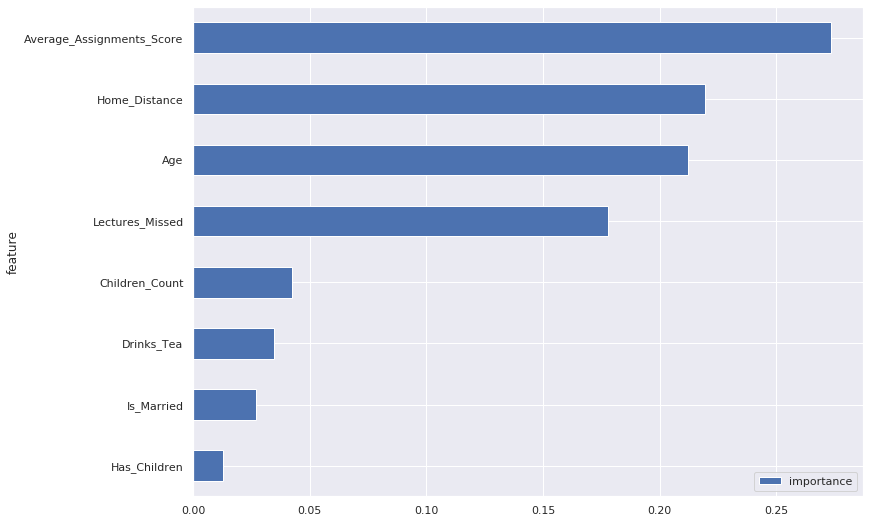

In [28]:
df_fi_X1_rf1.plot(kind='barh')

In [29]:
df_fi_X2_rf2 = pd.DataFrame({'feature': list(X2_test.columns), 
                             'importance': list(rf_model_2.feature_importances_)})
df_fi_X2_rf2.sort_values(by='importance', inplace=True)
df_fi_X2_rf2.set_index('feature', drop=True, inplace=True)
df_fi_X2_rf2

,importance
feature,
Has_Children,0.029541
Drinks_Tea,0.036749
Lectures_Missed,0.186468
Age,0.217059
Home_Distance,0.239716
Average_Assignments_Score,0.290467


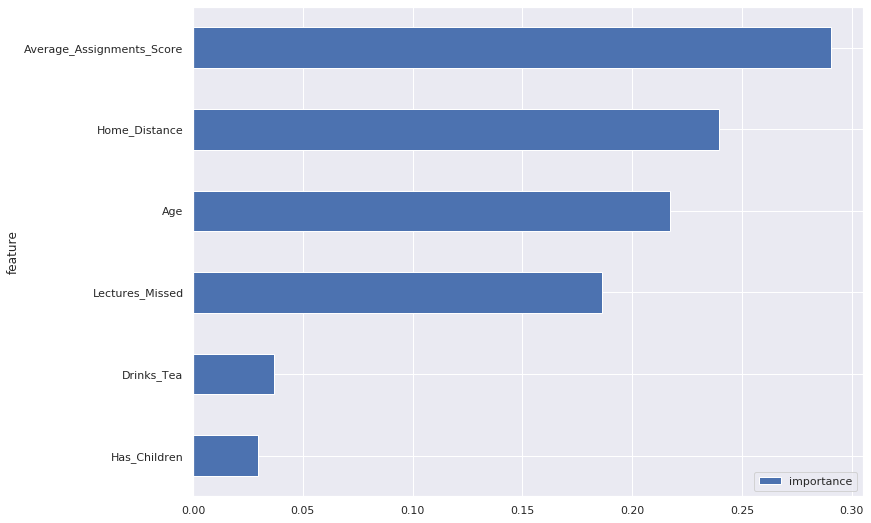

In [30]:
df_fi_X2_rf2.plot(kind='barh')

### Feature set 3: based on RFC.feature_importances_ (keeping only top 4, both models show the same top 4 features)

In [31]:
df_feature_set_3 = df_student_historic_raw_data.loc[:, ['Average_Assignments_Score', 'Home_Distance', 'Age', 'Lectures_Missed']]
df_feature_set_3.shape

(1000, 4)

In [32]:
X3_train, X3_test = train_test_split(df_feature_set_3, random_state=0)
print(X3_train.shape, y_train.shape)
print(X3_test.shape, y_test.shape)

(750, 4) (750,)
(250, 4) (250,)


### Model 7: LRC with X3

In [33]:
lr_model_3 = LRC(random_state=0)
lr_model_3.fit(X3_train, y_train)
lr_model_3_y_hat = lr_model_3.predict(X3_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_3_y_hat, name='Predicted')
lr_model_3_cm = pd.crosstab(y_actual, y_predicted)
print(lr_model_3_cm, '\n')
lr_model_3_acc = accuracy_score(y_test, lr_model_3_y_hat)
lr_model_3_bac = balanced_accuracy_score(y_test, lr_model_3_y_hat)
lr_model_3_rec = recall_score(y_test, lr_model_3_y_hat)
print('ACC: {:>.3f}\tBAC: {:>.3f}\tREC: {:>.3f}'.format(lr_model_3_acc, lr_model_3_bac, lr_model_3_rec))
model_names.append('lr_model_3')
model_feature_counts.append(X3_train.shape[1])
model_feature_names.append(list(X3_train.columns))
model_acc_scores.append(lr_model_3_acc)
model_bac_scores.append(lr_model_3_bac)
model_rec_scores.append(lr_model_3_rec)

Predicted   0    1
Actual            
0          32   65
1          10  143 

ACC: 0.700	BAC: 0.632	REC: 0.935


### Model 8: DTC with X3

In [34]:
dt_model_3 = DTC(random_state=0)
dt_model_3.fit(X3_train, y_train)
dt_model_3_y_hat = dt_model_3.predict(X3_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(dt_model_3_y_hat, name='Predicted')
dt_model_3_cm = pd.crosstab(y_actual, y_predicted)
print(dt_model_3_cm, '\n')
dt_model_3_acc = accuracy_score(y_test, dt_model_3_y_hat)
dt_model_3_bac = balanced_accuracy_score(y_test, dt_model_3_y_hat)
dt_model_3_rec = recall_score(y_test, dt_model_3_y_hat)
print('ACC: {:>.3f}\tBAC: {:>.3f}\tREC: {:>.3f}'.format(dt_model_3_acc, dt_model_3_bac, dt_model_3_rec))
model_names.append('dt_model_3')
model_feature_counts.append(X3_train.shape[1])
model_feature_names.append(list(X3_train.columns))
model_acc_scores.append(dt_model_3_acc)
model_bac_scores.append(dt_model_3_bac)
model_rec_scores.append(dt_model_3_rec)

Predicted   0    1
Actual            
0          42   55
1          53  100 

ACC: 0.568	BAC: 0.543	REC: 0.654


### Model 9: RFC with X3

In [35]:
rf_model_3 = RFC(random_state=0)
rf_model_3.fit(X3_train, y_train)
rf_model_3_y_hat = rf_model_3.predict(X3_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(rf_model_3_y_hat, name='Predicted')
rf_model_3_cm = pd.crosstab(y_actual, y_predicted)
print(rf_model_3_cm, '\n')
rf_model_3_acc = accuracy_score(y_test, rf_model_3_y_hat)
rf_model_3_bac = balanced_accuracy_score(y_test, rf_model_3_y_hat)
rf_model_3_rec = recall_score(y_test, rf_model_3_y_hat)
print('ACC: {:>.3f}\tBAC: {:>.3f}\tREC: {:>.3f}'.format(rf_model_3_acc, rf_model_3_bac, rf_model_3_rec))
model_names.append('rf_model_3')
model_feature_counts.append(X3_train.shape[1])
model_feature_names.append(list(X3_train.columns))
model_acc_scores.append(rf_model_3_acc)
model_bac_scores.append(rf_model_3_bac)
model_rec_scores.append(rf_model_3_rec)

Predicted   0    1
Actual            
0          45   52
1          30  123 

ACC: 0.672	BAC: 0.634	REC: 0.804


In [36]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': model_feature_counts, 
                              'feature_names': model_feature_names, 'acc': model_acc_scores, 
                              'bac': model_bac_scores, 'rec': model_rec_scores})
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67
2,lr_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.69,0.62,0.93
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88
5,rf_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.70,0.64,0.88
6,lr_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.70,0.63,0.93
7,dt_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.57,0.54,0.65
8,rf_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.67,0.63,0.80


#### Assume that for this project, the primary metric is BAC and the secondary metric is REC.
#### Then you can evaluate the models using a weighted average, for example: (.60 * bac + .40 * rec) / 2
#### The decision as to what weights to use would come from your understanding of the data and business requirements

### Feature set 4: based on analysis of both RFC.feature_importances_ and correlation matrix (keeping only top 3)

In [37]:
df_feature_set_4 = df_student_historic_raw_data.loc[:, ['Average_Assignments_Score', 'Age', 'Lectures_Missed']]
df_feature_set_4.shape

(1000, 3)

In [38]:
X4_train, X4_test = train_test_split(df_feature_set_4, random_state=0)
print(X4_train.shape, y_train.shape)
print(X4_test.shape, y_test.shape)

(750, 3) (750,)
(250, 3) (250,)


### Model 10: LRC with X4

In [39]:
lr_model_4 = LRC(random_state=0)
lr_model_4.fit(X4_train, y_train)
lr_model_4_y_hat = lr_model_4.predict(X4_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_4_y_hat, name='Predicted')
lr_model_4_cm = pd.crosstab(y_actual, y_predicted)
print(lr_model_4_cm, '\n')
lr_model_4_acc = accuracy_score(y_test, lr_model_4_y_hat)
lr_model_4_bac = balanced_accuracy_score(y_test, lr_model_4_y_hat)
lr_model_4_rec = recall_score(y_test, lr_model_4_y_hat)
print('ACC: {:>.4f}\tBAC: {:>.4f}\tREC: {:>.4f}'.format(lr_model_4_acc, lr_model_4_bac, lr_model_4_rec))
model_names.append('lr_model_4')
model_feature_counts.append(X4_train.shape[1])
model_feature_names.append(list(X4_train.columns))
model_acc_scores.append(lr_model_4_acc)
model_bac_scores.append(lr_model_4_bac)
model_rec_scores.append(lr_model_4_rec)

Predicted   0    1
Actual            
0          32   65
1           9  144 

ACC: 0.7040	BAC: 0.6355	REC: 0.9412


### Model 11: DTC with X4

In [40]:
dt_model_4 = DTC(random_state=0)
dt_model_4.fit(X4_train, y_train)
dt_model_4_y_hat = dt_model_4.predict(X4_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(dt_model_4_y_hat, name='Predicted')
dt_model_4_cm = pd.crosstab(y_actual, y_predicted)
print(dt_model_4_cm, '\n')
dt_model_4_acc = accuracy_score(y_test, dt_model_4_y_hat)
dt_model_4_bac = balanced_accuracy_score(y_test, dt_model_4_y_hat)
dt_model_4_rec = recall_score(y_test, dt_model_4_y_hat)
print('ACC: {:>.4f}\tBAC: {:>.4f}\tREC: {:>.4f}'.format(dt_model_4_acc, dt_model_4_bac, dt_model_4_rec))
model_names.append('dt_model_4')
model_feature_counts.append(X4_train.shape[1])
model_feature_names.append(list(X4_train.columns))
model_acc_scores.append(dt_model_4_acc)
model_bac_scores.append(dt_model_4_bac)
model_rec_scores.append(dt_model_4_rec)

Predicted   0   1
Actual           
0          47  50
1          56  97 

ACC: 0.5760	BAC: 0.5593	REC: 0.6340


### Model 12: RFC with X4

In [41]:
rf_model_4 = RFC(random_state=0)
rf_model_4.fit(X4_train, y_train)
rf_model_4_y_hat = rf_model_4.predict(X4_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(rf_model_4_y_hat, name='Predicted')
rf_model_4_cm = pd.crosstab(y_actual, y_predicted)
print(rf_model_4_cm, '\n')
rf_model_4_acc = accuracy_score(y_test, rf_model_4_y_hat)
rf_model_4_bac = balanced_accuracy_score(y_test, rf_model_4_y_hat)
rf_model_4_rec = recall_score(y_test, rf_model_4_y_hat)
print('ACC: {:>.4f}\tBAC: {:>.4f}\tREC: {:>.4f}'.format(rf_model_4_acc, rf_model_4_bac, rf_model_4_rec))
model_names.append('rf_model_4')
model_feature_counts.append(X4_train.shape[1])
model_feature_names.append(list(X4_train.columns))
model_acc_scores.append(rf_model_4_acc)
model_bac_scores.append(rf_model_4_bac)
model_rec_scores.append(rf_model_4_rec)

Predicted   0    1
Actual            
0          44   53
1          31  122 

ACC: 0.6640	BAC: 0.6255	REC: 0.7974


In [42]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': model_feature_counts, 
                              'feature_names': model_feature_names, 'acc': model_acc_scores, 
                              'bac': model_bac_scores, 'rec': model_rec_scores})
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67
2,lr_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.69,0.62,0.93
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88
5,rf_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.70,0.64,0.88
6,lr_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.70,0.63,0.93
7,dt_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.57,0.54,0.65
8,rf_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.67,0.63,0.80
9,lr_model_4,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.70,0.64,0.94


### Model 13: LRC with X4 and manual hyper-parameter tuning for class_weight

In [43]:
lr_model_5 = LRC(random_state=0, class_weight='balanced')
lr_model_5.fit(X4_train, y_train)
lr_model_5_y_hat = lr_model_5.predict(X4_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_5_y_hat, name='Predicted')
lr_model_5_cm = pd.crosstab(y_actual, y_predicted)
lr_model_5_acc = accuracy_score(y_test, lr_model_5_y_hat)
lr_model_5_bac = balanced_accuracy_score(y_test, lr_model_5_y_hat)
lr_model_5_rec = recall_score(y_test, lr_model_5_y_hat)
model_names.append('lr_model_5')
model_feature_counts.append(X4_train.shape[1])
model_feature_names.append(list(X4_train.columns))
model_acc_scores.append(lr_model_5_acc)
model_bac_scores.append(lr_model_5_bac)
model_rec_scores.append(lr_model_5_rec)

### Model 14: LRC with X4 and automatic hyper-parameter tuning using GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
lr_hp_grid = {'C': [0.01, 0.1, 1.0, 2.0, 5.0], 
              'class_weight': [None, 'balanced'],
              'solver': ['lbfgs', 'liblinear', 'newton-cg']}

In [46]:
lr_gscv = GridSearchCV(estimator=LRC(random_state=0), param_grid=lr_hp_grid, verbose=10)

In [47]:
lr_gscv.fit(df_feature_set_4, labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.670, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.685, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.705, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.665, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.675, total=   0.0s
[CV] C=0.01, class_weight=None, solver=liblinear .....................
[CV]  C=0.01, class_weight=None, solver=liblinear, score=0.670, total=   0.0s
[CV] C=0.01, class_weight=None, solver=liblinear ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.01, class_weight=balanced, solver=newton-cg, score=0.645, total=   0.0s
[CV] C=0.1, class_weight=None, solver=lbfgs ..........................
[CV]  C=0.1, class_weight=None, solver=lbfgs, score=0.655, total=   0.0s
[CV] C=0.1, class_weight=None, solver=lbfgs ..........................
[CV]  C=0.1, class_weight=None, solver=lbfgs, score=0.685, total=   0.0s
[CV] C=0.1, class_weight=None, solver=lbfgs ..........................
[CV]  C=0.1, class_weight=None, solver=lbfgs, score=0.710, total=   0.0s
[CV] C=0.1, class_weight=None, solver=lbfgs ..........................
[CV]  C=0.1, class_weight=None, solver=lbfgs, score=0.665, total=   0.0s
[CV] C=0.1, class_weight=None, solver=lbfgs ..........................
[CV]  C=0.1, class_weight=None, solver=lbfgs, score=0.685, total=   0.0s
[CV] C=0.1, class_weight=None, solver=liblinear ......................
[CV]  C=0.1, class_weight=None, solver=liblinear, score=0.665, total=   0.0s
[CV] C=0.1, class_weight=None, solver=liblinear ..

[CV]  C=1.0, class_weight=balanced, solver=newton-cg, score=0.625, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=newton-cg ..................
[CV]  C=1.0, class_weight=balanced, solver=newton-cg, score=0.630, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=newton-cg ..................
[CV]  C=1.0, class_weight=balanced, solver=newton-cg, score=0.600, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=newton-cg ..................
[CV]  C=1.0, class_weight=balanced, solver=newton-cg, score=0.570, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=newton-cg ..................
[CV]  C=1.0, class_weight=balanced, solver=newton-cg, score=0.645, total=   0.0s
[CV] C=2.0, class_weight=None, solver=lbfgs ..........................
[CV]  C=2.0, class_weight=None, solver=lbfgs, score=0.650, total=   0.0s
[CV] C=2.0, class_weight=None, solver=lbfgs ..........................
[CV]  C=2.0, class_weight=None, solver=lbfgs, score=0.685, total=   0.0s
[CV] C=2.0, class_weigh

[CV]  C=5.0, class_weight=balanced, solver=newton-cg, score=0.600, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=newton-cg ..................
[CV]  C=5.0, class_weight=balanced, solver=newton-cg, score=0.570, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=newton-cg ..................
[CV]  C=5.0, class_weight=balanced, solver=newton-cg, score=0.645, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 2.0, 5.0],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [48]:
lr_gscv.best_params_

{'C': 0.1, 'class_weight': None, 'solver': 'liblinear'}

In [49]:
lr_model_6 = LRC(random_state=0, class_weight=None, C=0.1, solver='liblinear')
lr_model_6.fit(X4_train, y_train)
lr_model_6_y_hat = lr_model_6.predict(X4_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_6_y_hat, name='Predicted')
lr_model_6_cm = pd.crosstab(y_actual, y_predicted)
lr_model_6_acc = accuracy_score(y_test, lr_model_6_y_hat)
lr_model_6_bac = balanced_accuracy_score(y_test, lr_model_6_y_hat)
lr_model_6_rec = recall_score(y_test, lr_model_6_y_hat)
model_names.append('lr_model_6')
model_feature_counts.append(X4_train.shape[1])
model_feature_names.append(list(X4_train.columns))
model_acc_scores.append(lr_model_6_acc)
model_bac_scores.append(lr_model_6_bac)
model_rec_scores.append(lr_model_6_rec)

In [50]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': model_feature_counts, 
                              'feature_names': model_feature_names, 'acc': model_acc_scores, 
                              'bac': model_bac_scores, 'rec': model_rec_scores})
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67
2,lr_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.69,0.62,0.93
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88
5,rf_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.70,0.64,0.88
6,lr_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.70,0.63,0.93
7,dt_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.57,0.54,0.65
8,rf_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.67,0.63,0.80
9,lr_model_4,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.70,0.64,0.94


### Model 15: LRC with X4 and automatic hyper-parameter tuning using GridSearchCV and specified evaluation metric (balanced_accuracy instead of accuracy in this case)

In [51]:
lr_gscv_2 = GridSearchCV(estimator=LRC(random_state=0), param_grid=lr_hp_grid, verbose=10, scoring='balanced_accuracy')

In [52]:
lr_gscv_2.fit(df_feature_set_4, labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.599, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.621, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.645, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.606, total=   0.0s
[CV] C=0.01, class_weight=None, solver=lbfgs .........................
[CV]  C=0.01, class_weight=None, solver=lbfgs, score=0.609, total=   0.0s
[CV] C=0.01, class_weight=None, solver=liblinear .....................
[CV]  C=0.01, class_weight=None, solver=liblinear, score=0.601, total=   0.0s
[CV] C=0.01, class_weight=None, solver=liblinear ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.01, class_weight=None, solver=newton-cg, score=0.645, total=   0.0s
[CV] C=0.01, class_weight=None, solver=newton-cg .....................
[CV]  C=0.01, class_weight=None, solver=newton-cg, score=0.606, total=   0.0s
[CV] C=0.01, class_weight=None, solver=newton-cg .....................
[CV]  C=0.01, class_weight=None, solver=newton-cg, score=0.609, total=   0.0s
[CV] C=0.01, class_weight=balanced, solver=lbfgs .....................
[CV]  C=0.01, class_weight=balanced, solver=lbfgs, score=0.632, total=   0.0s
[CV] C=0.01, class_weight=balanced, solver=lbfgs .....................
[CV]  C=0.01, class_weight=balanced, solver=lbfgs, score=0.630, total=   0.0s
[CV] C=0.01, class_weight=balanced, solver=lbfgs .....................
[CV]  C=0.01, class_weight=balanced, solver=lbfgs, score=0.603, total=   0.0s
[CV] C=0.01, class_weight=balanced, solver=lbfgs .....................
[CV]  C=0.01, class_weight=balanced, solver=lbfgs, score=0.566, total=   0.0s
[CV] C=0.01, class_weight=ba

[CV]  C=1.0, class_weight=balanced, solver=lbfgs, score=0.573, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=lbfgs ......................
[CV]  C=1.0, class_weight=balanced, solver=lbfgs, score=0.646, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=1.0, class_weight=balanced, solver=liblinear, score=0.624, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=1.0, class_weight=balanced, solver=liblinear, score=0.634, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=1.0, class_weight=balanced, solver=liblinear, score=0.612, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=1.0, class_weight=balanced, solver=liblinear, score=0.569, total=   0.0s
[CV] C=1.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=1.0, class_weight=balanced, solver=liblinear, score=0.648, total=   0.0s
[CV] C=1.0, cla

[CV]  C=5.0, class_weight=balanced, solver=lbfgs, score=0.630, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=lbfgs ......................
[CV]  C=5.0, class_weight=balanced, solver=lbfgs, score=0.593, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=lbfgs ......................
[CV]  C=5.0, class_weight=balanced, solver=lbfgs, score=0.573, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=lbfgs ......................
[CV]  C=5.0, class_weight=balanced, solver=lbfgs, score=0.646, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=5.0, class_weight=balanced, solver=liblinear, score=0.624, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=5.0, class_weight=balanced, solver=liblinear, score=0.630, total=   0.0s
[CV] C=5.0, class_weight=balanced, solver=liblinear ..................
[CV]  C=5.0, class_weight=balanced, solver=liblinear, score=0.604, total=   0.0s
[CV] C=5.0, class_weigh

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1.0, 2.0, 5.0],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='balanced_accuracy', verbose=10)

In [53]:
lr_gscv_2.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'solver': 'liblinear'}

In [54]:
lr_model_7 = LRC(random_state=0, class_weight='balanced', C=0.1, solver='liblinear')
lr_model_7.fit(X4_train, y_train)
lr_model_7_y_hat = lr_model_7.predict(X4_test)
y_actual = pd.Series(y_test.values, name='Actual')
y_predicted = pd.Series(lr_model_7_y_hat, name='Predicted')
lr_model_7_cm = pd.crosstab(y_actual, y_predicted)
lr_model_7_acc = accuracy_score(y_test, lr_model_7_y_hat)
lr_model_7_bac = balanced_accuracy_score(y_test, lr_model_7_y_hat)
lr_model_7_rec = recall_score(y_test, lr_model_7_y_hat)
model_names.append('lr_model_7')
model_feature_counts.append(X4_train.shape[1])
model_feature_names.append(list(X4_train.columns))
model_acc_scores.append(lr_model_7_acc)
model_bac_scores.append(lr_model_7_bac)
model_rec_scores.append(lr_model_7_rec)

In [55]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': model_feature_counts, 
                              'feature_names': model_feature_names, 'acc': model_acc_scores, 
                              'bac': model_bac_scores, 'rec': model_rec_scores})
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67
2,lr_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.69,0.62,0.93
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88
5,rf_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.70,0.64,0.88
6,lr_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.70,0.63,0.93
7,dt_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.57,0.54,0.65
8,rf_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.67,0.63,0.80
9,lr_model_4,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.70,0.64,0.94


### Since we are considering BAC as the primary metric and REC as secondary metric for evaluating the models, let us assume the following weighted scoring:

60% of BAC + 40% of REC

In [56]:
df_model_eval['weighted_score'] = df_model_eval.bac * 0.6 + df_model_eval.rec * 0.4
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec,weighted_score
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92,0.72
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67,0.59
2,lr_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.69,0.62,0.93,0.75
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70,0.61
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88,0.72
5,rf_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.70,0.64,0.88,0.74
6,lr_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.70,0.63,0.93,0.75
7,dt_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.57,0.54,0.65,0.59
8,rf_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.67,0.63,0.80,0.70
9,lr_model_4,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.70,0.64,0.94,0.76


In [57]:
df_model_eval.sort_values(by='weighted_score', inplace=True)
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,rec,weighted_score
7,dt_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.57,0.54,0.65,0.59
1,dt_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.56,0.53,0.67,0.59
10,dt_model_4,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.58,0.56,0.63,0.59
3,dt_model_2,6,"[Age, Has_Children, Home_Distance, Drinks_Tea,...",0.58,0.55,0.70,0.61
14,lr_model_7,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.65,0.65,0.66,0.65
12,lr_model_5,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.66,0.66,0.67,0.66
11,rf_model_4,3,"[Average_Assignments_Score, Age, Lectures_Missed]",0.66,0.63,0.80,0.69
8,rf_model_3,4,"[Average_Assignments_Score, Home_Distance, Age...",0.67,0.63,0.80,0.70
0,lr_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.66,0.59,0.92,0.72
4,rf_model_1,8,"[Age, Is_Married, Has_Children, Children_Count...",0.68,0.62,0.88,0.72


### Always remember Ockham's Razor, a.k.a., The Law of Parsimony:

You will come across various explanations of this principle, but a simple way to understand the principle is "simplify when you can"!!

If you have to select the best model from the above 15 models, you can start by considering the top 5 models. Then compare them for the scores and parsimony.

From the above table, the top 3 based on score alone are lr_model_4, lr_model_3 and lr_model_6. Among these, the most parsimonious are lr_model_4 and lr_model_6. So, from both the score perspective and parsimony perspective, lr_model_4 is the best model.

Now, assume that lr_model_4 does not exist. In that case we are left with considering lr_model_3 and lr_model_6. Both have the same scores, but lr_model_6 is much more parsimonious. In this case, lr_model_6 would be the best model.